In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [5]:
data = "Admission_Predict_Ver1.1.csv"
df = pd.read_csv(data)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
#Strip white space from headers
df.columns = df.columns.str.strip()

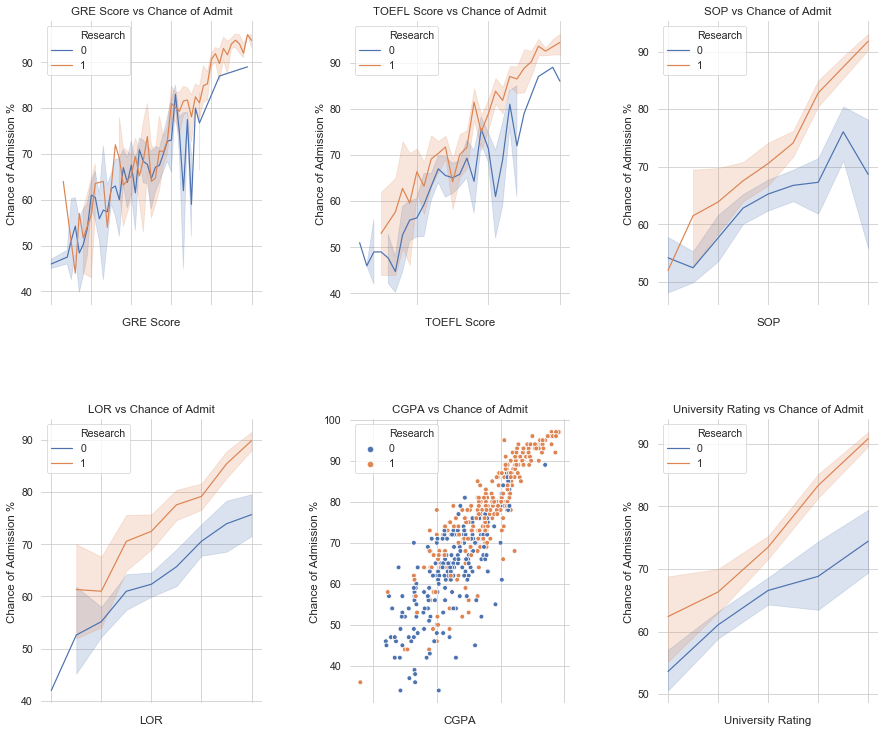

In [24]:
fig, axs = plt.subplots(figsize=(15,12), ncols=3, nrows=2)
sns.set(style='whitegrid', rc={"font.size":8,"axes.titlesize":10,"axes.labelsize":8})
sns.set_context("paper", font_scale=1.2)


sns.lineplot(x = df["GRE Score"], y = df["Chance of Admit"]*100, hue=df["Research"], ax=axs[0][0]).set(title="GRE Score vs Chance of Admit", xlabel="GRE Score")
sns.lineplot(x = df["TOEFL Score"], y = df["Chance of Admit"]*100, hue=df["Research"],ax=axs[0][1]).set(title="TOEFL Score vs Chance of Admit", xlabel="TOEFL Score")
sns.lineplot(x = df["SOP"], y = df["Chance of Admit"]*100, hue=df["Research"],ax=axs[0][2]).set(title="SOP vs Chance of Admit", xlabel="SOP")
sns.lineplot(x = df["LOR"], y = df["Chance of Admit"]*100, hue=df["Research"],ax=axs[1][0]).set(title="LOR vs Chance of Admit", xlabel="LOR")
sns.scatterplot(x = df["CGPA"], y = df["Chance of Admit"]*100, hue=df["Research"],ax=axs[1][1]).set(title="CGPA vs Chance of Admit", xlabel="CGPA")
sns.lineplot(x = df["University Rating"], y = df["Chance of Admit"]*100, hue=df["Research"],ax=axs[1][2]).set(title="University Rating vs Chance of Admit", xlabel="University Rating")

plt.subplots_adjust(top = 0.8, bottom=0.01, hspace=0.4, wspace=0.4)

   

for ax in axs.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha='right', fontweight='light', fontsize='small');
    ax.set_ylabel("Chance of Admission %")
    
sns.despine(left=True, bottom=True)                                                   
plt.savefig('Chance_of_Admission_Based_on_different_factors.jpeg', bbox_inches='tight') #can be .pdf,png, tif, jpeg, etc

#### Investigating GRE Score distribution

The average GRE Score is:  316.472


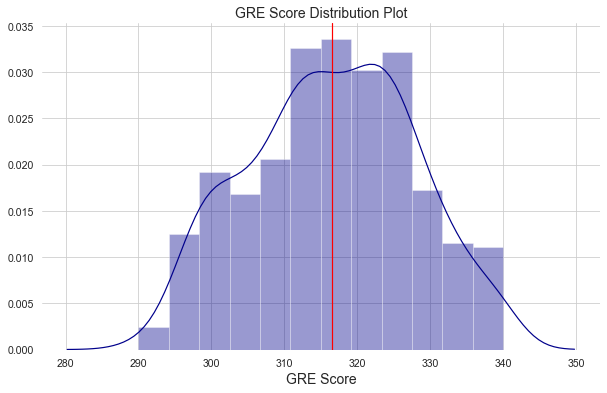

In [41]:
#Investigating GRE Score distribution
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style='whitegrid', rc={"font.size":8,"axes.titlesize":10,"axes.labelsize":8})
sns.set_context("paper", font_scale=1.2)

x = df['GRE Score'].values

sns.distplot(x, color='darkblue');

#Calculating the mean
mean = df['GRE Score'].mean();

#plotting the mean
plt.axvline(mean, 0,1, color='red');
plt.xlabel("GRE Score", fontsize=14)
plt.title("GRE Score Distribution Plot", fontsize=14)


print("The average GRE Score is: ", mean)
sns.despine(left=True, bottom=True)                                                   
plt.savefig('GRE_Distribution.jpeg', bbox_inches='tight')

### Investigating CGPA Score distribution

The average CGPA is:  8.576439999999998


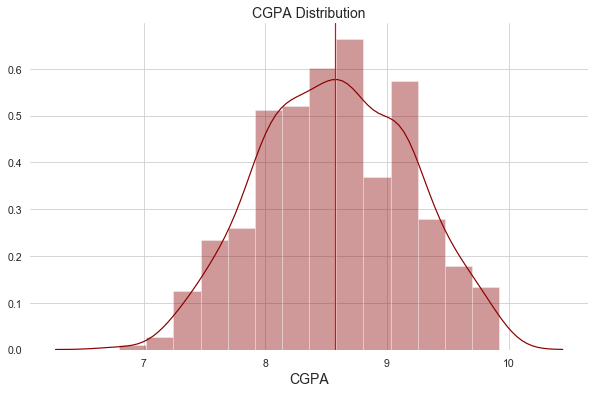

In [45]:
#Investigating CGPA Score distribution
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style='whitegrid', rc={"font.size":8,"axes.titlesize":10,"axes.labelsize":8})
sns.set_context("paper", font_scale=1.2)

x = df['CGPA'].values

sns.distplot(x, color='darkred');

#Calculating the mean
mean = df['CGPA'].mean();

#plotting the mean
plt.axvline(mean, 0,1, color='red');
plt.xlabel("CGPA", fontsize=14)
plt.title("CGPA Distribution", fontsize=14)


print("The average CGPA is: ", mean)
sns.despine(left=True, bottom=True)                                                   
plt.savefig('CGPA_Distribution.jpeg', bbox_inches='tight')

#### Investigating Chance of admission by the strength of the letter of recommendation and university rating

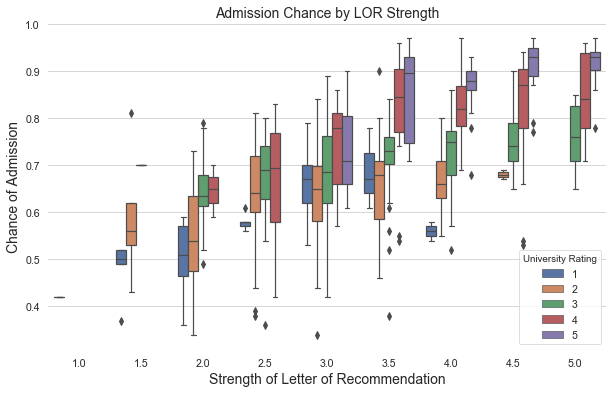

In [51]:
#Investigating Chance of admission by the strength of the letter of recommendation and university rating
ax = sns.boxplot(x="LOR", y='Chance of Admit', data=df, hue="University Rating")
plt.xlabel("Strength of Letter of Recommendation", fontsize=14)
plt.ylabel("Chance of Admission", fontsize=14)
plt.title("Admission Chance by LOR Strength", fontsize=14)

sns.despine(left=True, bottom=True)                                                   
plt.savefig('Admission_Chance_by_Letter_of_recommendation.jpeg', bbox_inches='tight')

#### Investigating Chance of admission by the strength of the statement of purpose and university rating

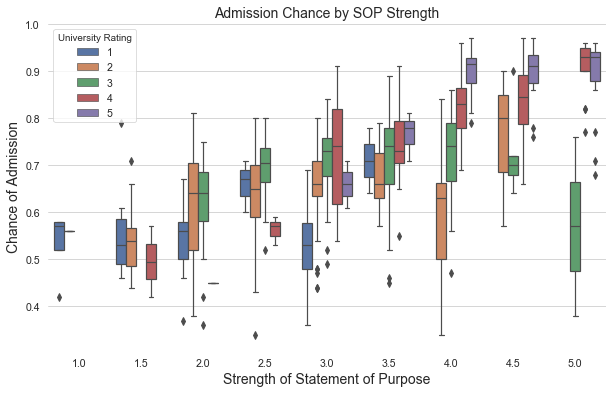

In [90]:
#Investigating Chance of admission by the strength of the statement of purpose and university rating
ax = sns.boxplot(x="SOP", y='Chance of Admit', data=df, hue="University Rating")
plt.xlabel("Strength of Statement of Purpose", fontsize=14)
plt.ylabel("Chance of Admission", fontsize=14)
plt.title("Admission Chance by SOP Strength", fontsize=14)

sns.despine(left=True, bottom=True)                                                   
plt.savefig('Admission_Chance_by_SOP.jpeg', bbox_inches='tight')

### Plotting relationship between dataset - Categorize by University Rating

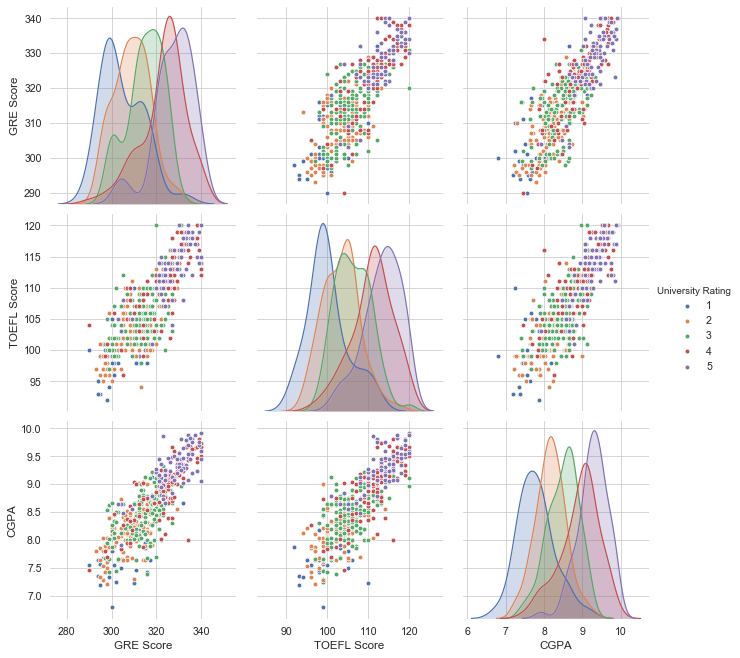

In [75]:
sns.set_style("whitegrid", rc={"font.size":8,"axes.labelsize":8})
ax = sns.pairplot(df, hue="University Rating", diag_kind = 'kde', vars=["GRE Score", "TOEFL Score", "CGPA"], height=3)
#plt.suptitle('Pair Plot of Admission Data', size = 18);

sns.despine(left=True, bottom=True)                                                   
plt.savefig('Relationship_between_Application_requirements.jpeg', bbox_inches='tight')

### Plotting relationship between dataset - Categorize by Research

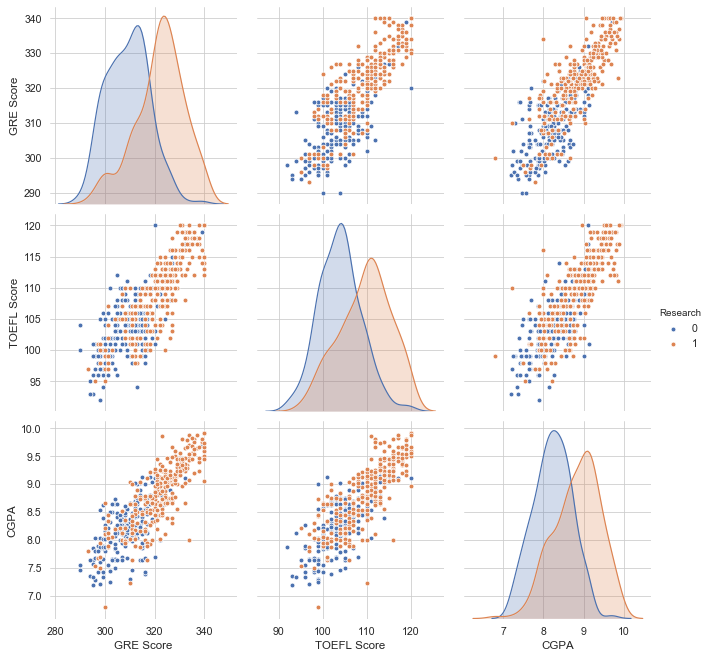

In [76]:
sns.set_style("whitegrid", rc={"font.size":8,"axes.labelsize":8})
ax = sns.pairplot(df, hue="Research", diag_kind = 'kde', vars=["GRE Score", "TOEFL Score", "CGPA"], height=3)

sns.despine(left=True, bottom=True)                                                   
plt.savefig('Relationship_between_Application_requirements.jpeg', bbox_inches='tight')

### Heatmap Correlation of different Factors

In [93]:
correlations_data = df.corr()['Chance of Admit'].sort_values()
correlations_data.head()

Serial No.           0.008505
Research             0.545871
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
Name: Chance of Admit, dtype: float64

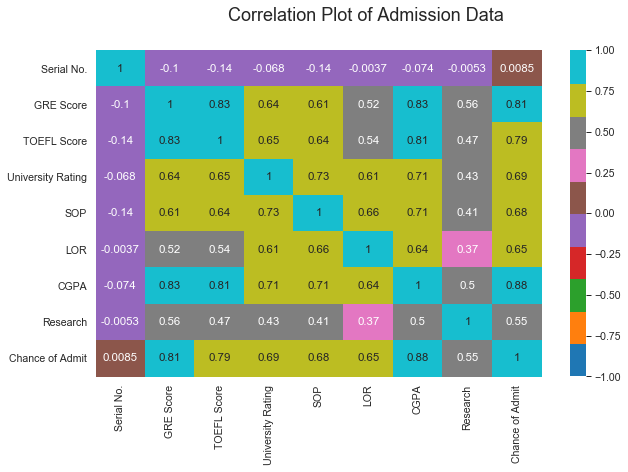

In [88]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'tab10');
plt.suptitle('Correlation Plot of Admission Data', size = 18);

sns.despine(left=True, bottom=True)                                                   
plt.savefig('Correlation_Plot_of_Application_requirements.jpeg', bbox_inches='tight')

### Feature Engineering

For this project, we will take the following feature engineering steps:
- One-hot encode categorical variables (university rating and research use type)
- Add in the natural log transformation of the numerical variables

In [97]:
# Copy the original data
features = df.copy()

# Select the numeric columns
numeric_subset = df.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = df[['University Rating', 'Research']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

c:\users\bamid\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


In [99]:
#We have extracted 500 features
features  = features.dropna(axis=1, how = 'all')
print(features.shape)

(500, 20)


In [106]:
targets = df['Chance of Admit']
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

In [107]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 0.73
Baseline Performance on the test set: MAE = 0.1153


In [110]:
features.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,log_Serial No.,log_GRE Score,log_TOEFL Score,log_University Rating,log_SOP,log_LOR,log_CGPA,log_Research,log_Chance of Admit,University Rating,Research
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000000,5.820083,4.770685,1.386294,1.504077,1.504077,2.266958,0.0,-0.083382,4,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.693147,5.780744,4.672829,1.386294,1.386294,1.504077,2.182675,0.0,-0.274437,4,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1.098612,5.755742,4.644391,1.098612,1.098612,1.252763,2.079442,0.0,-0.328504,3,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1.386294,5.774552,4.700480,1.098612,1.252763,0.916291,2.159869,0.0,-0.223144,3,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,1.609438,5.749393,4.634729,0.693147,0.693147,1.098612,2.105353,-inf,-0.430783,2,0


### Predictive Analysis - Regression

Qualification/Header to test (e.g: GRE Score, CGPA, SOP, LOR, TOEFL Score): GRE Score
(500, 1)
(500, 1)


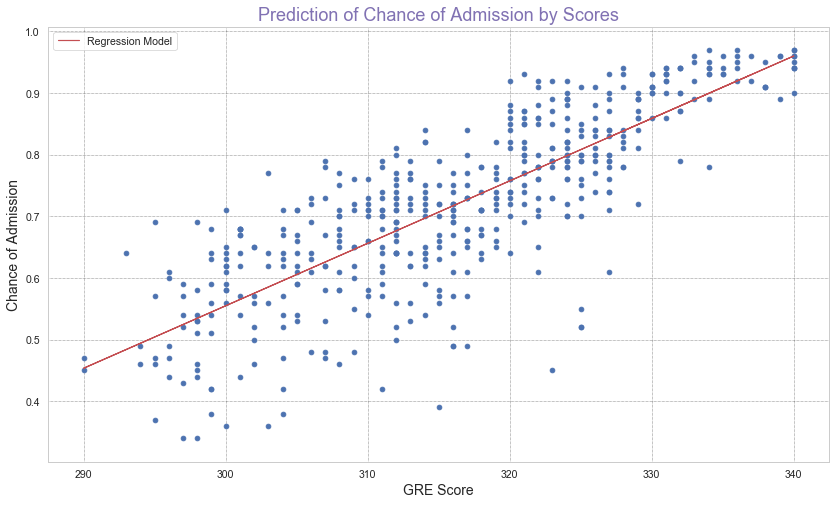

323
Chance of 323.0 GRE Score to get admission is 78.78416862846716 %


<Figure size 432x288 with 0 Axes>

In [155]:
s = str(input("Qualification/Header to test (e.g: GRE Score, CGPA, SOP, LOR, TOEFL Score): "))
x = features[s].values.reshape(-1,1)
y = targets.values.reshape(-1,1)
print(x.shape)
print(y.shape)

Poly_reg=PolynomialFeatures(degree=1) 
x_poly=Poly_reg.fit_transform(x)
Lin_reg = LinearRegression()
Lin_reg.fit(x_poly,y)

lin_reg = LinearRegression()
lin_reg.fit(x, y)

plt.figure(figsize=(14, 8))
plt.scatter(x,y)
plt.xlabel(s,fontsize=14)
plt.ylabel("Chance of Admission",fontsize=14)
plt.title("Prediction of Chance of Admission by Scores",fontdict={'fontsize': 18, 'fontweight': 'medium'},color='m')
plt.grid(color='k', linestyle='dotted', linewidth=0.5)
y_pred=Lin_reg.predict(x_poly)
plt.plot(x,y_pred,color="r",label="Regression Model")
plt.legend()
plt.show()

# Predicting chance of admission by Qualification with Polymonial Regression
n = float(input());
Prediction = float(Lin_reg.predict(Poly_reg.fit_transform([[n]])));
print("Chance of", n, s, "to get admission is", Prediction*100, "%")
plt.savefig('Regression Model.jpeg', bbox_inches='tight');